In [44]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
import random


class AgentState(TypedDict):
    player_name: str
    secret_number: int
    guesses: list[int]
    max_attempt: int
    counter: int
    lower_bound: int
    upper_bound: int
    verdict: int


def greeting_node(state: AgentState) -> AgentState:
    print(f"Hello, {state['player_name']}! Let's play a number guessing game.")
    state["counter"] = 0
    state["secret_number"] = random.randint(state["lower_bound"], state["upper_bound"])
    state["verdict"] = 0
    return state


def make_guess_node(state: AgentState) -> AgentState:
    guess = (state["lower_bound"] + state["upper_bound"]) // 2
    state["guesses"].append(guess)
    state["counter"] += 1
    last_guess = state["guesses"][-1]
    if last_guess < state["secret_number"]:
        print(f"My guess is {last_guess}. Too low!")
        state["lower_bound"] = last_guess + 1
    elif last_guess > state["secret_number"]:
        print(f"My guess is {last_guess}. Too high!")
        state["upper_bound"] = last_guess - 1
    elif last_guess == state["secret_number"]:
        print(f"My guess is {last_guess}. Correct!")
        state["verdict"] = 1
    print(f"Attempt {state['counter']}: I guess {guess}.")
    return state


def feedback_node(state: AgentState) -> bool:
    return_flag = True
    if state["counter"] >= state["max_attempt"]:
        print("I've used all my attempts! Game over.")
        return_flag = False
    elif state["verdict"] == 1:
        print(
            f"I've guessed your number {state['secret_number']} in {state['counter']} attempts!"
        )
        return_flag = False
    return return_flag

In [45]:
graph = StateGraph(AgentState)

graph.add_node("greeting_node", greeting_node)
graph.add_node("make_guess_node", make_guess_node)

graph.add_edge(START, "greeting_node")
graph.add_edge("greeting_node", "make_guess_node")
graph.add_conditional_edges(
    "make_guess_node",
    feedback_node,
    {
        True: "make_guess_node",
        False: END,
    },
)

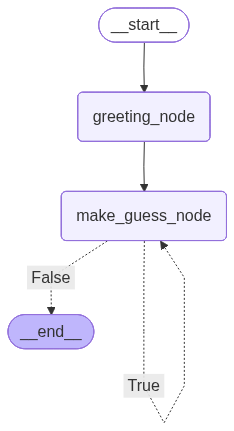

In [46]:
app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [47]:
app.invoke(
    AgentState(
        player_name="Rifat",
        secret_number=5,
        guesses=[],
        max_attempt=5,
        counter=0,
        lower_bound=1,
        upper_bound=10,
    )
)

Hello, Rifat! Let's play a number guessing game.
My guess is 5. Too high!
Attempt 1: I guess 5.
My guess is 2. Too high!
Attempt 2: I guess 2.
My guess is 1. Correct!
Attempt 3: I guess 1.
I've guessed your number 1 in 3 attempts!


{'player_name': 'Rifat',
 'secret_number': 1,
 'guesses': [5, 2, 1],
 'max_attempt': 5,
 'counter': 3,
 'lower_bound': 1,
 'upper_bound': 1,
 'verdict': 1}